In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


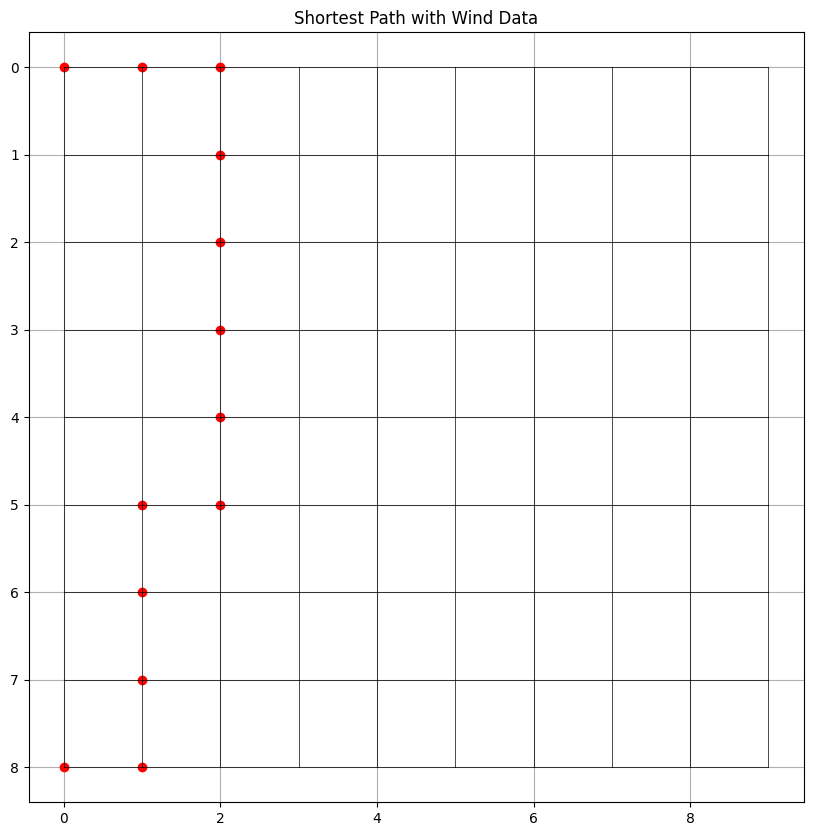

In [75]:
import pygrib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Specify the path to your GRIB file on Google Drive
grib_file_path = '/content/drive/My Drive/PWG.grb'

# Open the GRIB file
grbs = pygrib.open(grib_file_path)

# Create a grid with dimensions (num_rows, num_columns)
num_rows = grbs[1].values.shape[0]
num_columns = grbs[1].values.shape[1]

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes to the graph representing grid points
for i in range(num_rows):
    for j in range(num_columns):
        G.add_node((i, j))

# Calculate edge weights based on wind data
for i in range(num_rows):
    for j in range(num_columns):
        val1 = grbs[1].values[i][j]  # u wind component
        val2 = grbs[2].values[i][j]  # v wind component
        wind_speed = np.sqrt(val1**2 + val2**2)
        G.nodes[(i, j)]['wind_speed'] = wind_speed  # Store wind speed as node attribute

        # Connect the current node to its neighbors
        neighbors = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < num_rows and 0 <= neighbor[1] < num_columns:
                neighbor_val1 = grbs[1].values[neighbor[0]][neighbor[1]]
                neighbor_val2 = grbs[2].values[neighbor[0]][neighbor[1]]
                neighbor_wind_speed = np.sqrt(neighbor_val1**2 + neighbor_val2**2)
                weight = 1.0 / (wind_speed + neighbor_wind_speed)  # Inverse of wind speed as weight
                G.add_edge((i, j), neighbor, weight=weight)

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source=(num_rows - 1, 0), target=(0, 0), weight='weight')

# Create a grid plot with the shortest path in red
plt.figure(figsize=(10, 10))
for i in range(num_rows):
    for j in range(num_columns):
        if (i, j) in shortest_path:
            plt.plot(j, i, 'ro')  # Mark the path points in red
        else:
            plt.plot(j, i, '')  # Mark other points in blue

# Plot the edges
for edge in G.edges():
    plt.plot([edge[0][1], edge[1][1]], [edge[0][0], edge[1][0]], 'k-', lw=0.5)

plt.gca().invert_yaxis()  # Invert the y-axis to match the grid
plt.grid(True)
plt.title('Shortest Path with Wind Data')
plt.show()
